# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [ ]:
#!pip install tensorflow

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Dropout

from tensorflow.keras.models import load_model

from tensorflow.keras.optimizers import Adam

In [19]:
# Load the dataset (replace 'tic-tac-toe.csv' with the actual file path)
df = pd.read_csv('tic-tac-toe.csv')

# Display the first few rows to inspect
print(df.head())

# Summary statistics
print(df.info())
print(df.describe())

# Check unique values per column
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

# Convert categorical values in the first 9 columns (grids) to numeric
mapping = {'x': 1, 'o': -1, 'b': 0}
for col in df.columns[:-1]:  # Exclude the 'class' column
    df[col] = df[col].map(mapping)

# Convert the 'class' column to binary
df['class'] = df['class'].map({True: 1, False: 0})

# Check the transformed dataframe
print(df.head())

# Inputs (features) and output (target)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Display shapes for verification
print(f"\nInput shape: {X.shape}, Output shape: {y.shape}")

# Normalize the input data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Display the normalized inputs
print(X_normalized[:5])

  TL TM TR ML MM MR BL BM BR  class
0  x  x  x  x  o  o  x  o  o   True
1  x  x  x  x  o  o  o  x  o   True
2  x  x  x  x  o  o  o  o  x   True
3  x  x  x  x  o  o  o  b  b   True
4  x  x  x  x  o  o  b  o  b   True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TL      958 non-null    object
 1   TM      958 non-null    object
 2   TR      958 non-null    object
 3   ML      958 non-null    object
 4   MM      958 non-null    object
 5   MR      958 non-null    object
 6   BL      958 non-null    object
 7   BM      958 non-null    object
 8   BR      958 non-null    object
 9   class   958 non-null    bool  
dtypes: bool(1), object(9)
memory usage: 68.4+ KB
None
         TL   TM   TR   ML   MM   MR   BL   BM   BR class
count   958  958  958  958  958  958  958  958  958   958
unique    3    3    3    3    3    3    3    3    3     2
top       x    x  

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [45]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

print()

# Create the Sequential model with an Input layer
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer
    Dense(64, activation='relu'),     # First hidden layer
    Dense(32, activation='relu'),     # Second hidden layer
    Dense(2, activation='softmax')    # Output layer (2 classes: Player X wins or not)
])

# Display model summary
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

print()

# Save the model
# model.save('tic-tac-toe.model')
# print("Model saved as tic-tac-toe.model")

# Save the model in the native Keras format
model.save('tic-tac-toe.keras')
print("Model saved as tic-tac-toe.keras")

Training data shape: (766, 9)
Testing data shape: (192, 9)



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,786 (10.88 KB)

 Trainable params: 2,786 (10.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5985 - loss: 0.6607 - val_accuracy: 0.6818 - val_loss: 0.5845
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6731 - loss: 0.5822 - val_accuracy: 0.7273 - val_loss: 0.5574
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.7531 - loss: 0.5286 - val_accuracy: 0.7662 - val_loss: 0.5413
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.7695 - loss: 0.5191 - val_accuracy: 0.7662 - val_loss: 0.5137
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.7730 - loss: 0.4967 - val_accuracy: 0.7792 - val_loss: 0.5006
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.7958 - loss: 0.4659 - val_accuracy: 0.7792 - val_loss: 0.4834
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.7983 - loss: 0.4233 - val_accuracy: 0.8117 - val_loss: 0.4623
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.8392 - loss: 0.4072 - val_accuracy: 0.8182

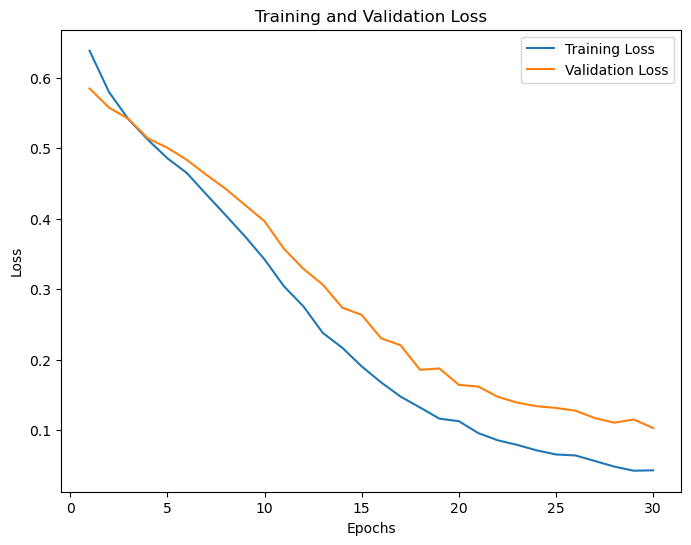

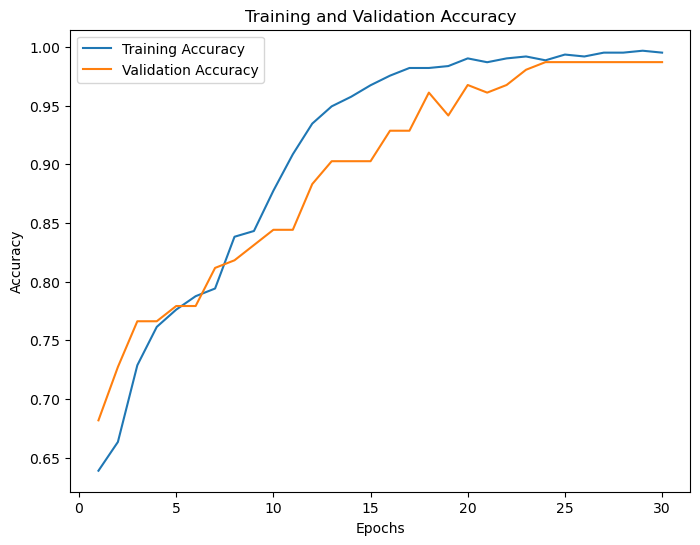

In [59]:
import matplotlib.pyplot as plt

# Extract training and validation metrics
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Number of epochs
epochs = range(1, len(training_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [69]:
# Load the saved model
model = load_model('tic-tac-toe.keras')  # Use 'tic-tac-toe.h5' if saved in HDF5 format
print("Model loaded successfully.")

# Select 5 random rows from the test dataset
random_indices = np.random.choice(X_test.shape[0], 5, replace=False)
X_sample = X_test[random_indices]
y_sample = y_test[random_indices]

# Display the selected rows
print("\nRandomly selected rows from test dataset:")
print(X_sample)
print("\nActual labels:", y_sample)

# Make predictions
predictions = model.predict(X_sample)

# Convert probabilities to class labels (0 or 1)
predicted_classes = np.argmax(predictions, axis=1)

# Display predictions
print("\nPredicted labels:", predicted_classes)

# Check if predictions match actual labels
total_labels_matched = 0
for i in range(len(y_sample)):
    print(f"Row {i + 1}: Actual = {y_sample[i]}, Predicted = {predicted_classes[i]}")
    if y_sample[i] == predicted_classes[i]:
        total_labels_matched += 1

print(f"\nTotal Labels Matched on Prediction: {total_labels_matched} of {len(y_sample)}")

Model loaded successfully.

Randomly selected rows from test dataset:
[[0.  1.  1.  0.5 0.  1.  0.5 0.  1. ]
 [0.  1.  0.  0.5 0.  1.  0.  1.  1. ]
 [1.  0.  0.5 0.  0.5 0.  1.  1.  1. ]
 [1.  0.  0.5 0.5 1.  0.  0.  1.  1. ]
 [0.5 0.  1.  1.  0.  1.  0.  0.5 1. ]]

Actual labels: [1 0 1 1 1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Predicted labels: [1 0 1 1 1]
Row 1: Actual = 1, Predicted = 1
Row 2: Actual = 0, Predicted = 0
Row 3: Actual = 1, Predicted = 1
Row 4: Actual = 1, Predicted = 1
Row 5: Actual = 1, Predicted = 1

Total Labels Matched on Prediction: 5 of 5


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [91]:
# Build an improved model with additional layers
# Use Dropout Regularization: Add Dropout layers to prevent overfitting.
improved_model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer
    Dense(128, activation='relu'),    # First hidden layer
    Dropout(0.2),                     # Dropout for regularization
    Dense(64, activation='relu'),     # Second hidden layer
    Dense(32, activation='relu'),     # Third hidden layer (added layer)
    Dropout(0.2),
    Dense(16, activation='relu'),     # Fourth hidden layer (added layer)
    Dense(2, activation='softmax')    # Output layer
])

# Display model summary
improved_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,178 (47.57 KB)

 Trainable params: 12,178 (47.57 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
# Define an Adam optimizer with a custom learning rate
custom_optimizer = Adam(learning_rate=0.001)  # Adjust the learning rate here

# Compile the model with the custom optimizer
improved_model.compile(optimizer=custom_optimizer,
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [95]:
# Train the improved model
improved_history = improved_model.fit(X_train, y_train, 
                                      epochs=50,  # Increase epochs for more training
                                      batch_size=16, 
                                      validation_split=0.2, 
                                      verbose=1)

# Evaluate the improved model
test_loss, test_accuracy = improved_model.evaluate(X_test, y_test, verbose=1)
print(f"\nImproved Model Test Loss: {test_loss}")
print(f"Improved Model Test Accuracy: {test_accuracy}")

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5842 - loss: 0.6734 - val_accuracy: 0.6818 - val_loss: 0.6072
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6641 - loss: 0.5966 - val_accuracy: 0.7208 - val_loss: 0.5834
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6786 - loss: 0.5699 - val_accuracy: 0.7143 - val_loss: 0.5765
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7379 - loss: 0.5410 - val_accuracy: 0.7338 - val_loss: 0.5457
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7211 - loss: 0.5151 - val_accuracy: 0.7597 - val_loss: 0.5156
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7662 - loss: 0.4668 - val_accuracy: 0.7792 - val_loss: 0.4745
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.7926 - loss: 0.4338 - val_accuracy: 0.7922 - val_loss: 0.4602
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8026 - loss: 0.4301 - val_accuracy: 0.7922 - val_los

In [ ]:
# Extract metrics
train_loss = improved_history.history['loss']
val_loss = improved_history.history['val_loss']
train_accuracy = improved_history.history['accuracy']
val_accuracy = improved_history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Which approach(es) did you find helpful to improve your model performance?**

### Adam Optimizer
The use of the Adam optimizer had the most significant impact. Its ability to adjust the learning rate dynamically during training improved convergence and led to:

- Lower loss: 0.0601 compared to 0.1105 (without Adam).
- Higher accuracy: 98.96% compared to 96.87% (without Adam).

Adam’s adaptability to different gradients and scales helped optimize weights more effectively than a fixed learning rate. Training with more epochs (50 in the Adam-based model vs. 30 in the simpler model) allowed the model to converge more effectively. The loss steadily decreased and plateaued, indicating that there was sufficient training time.

### Adding Dropout Layers
Introducing Dropout layers (with the Adam-based model) effectively reduced overfitting by randomly deactivating neurons during training:
- Validation accuracy stayed close to training accuracy, showing better generalization.
- The model maintained a high accuracy of 98.96% on test data.

### Increasing Model Complexity:
Adding more dense layers and neurons improved the model's capacity to learn complex patterns in the Tic-Tac-Toe dataset:

- Increased parameters from 2,786 to 12,178.
- Enabled the model to achieve a lower loss and better accuracy with minimal overfitting.

Stop increasing complexity further when no additional improvement was observed was useful to avoid unnecessary over-parameterization.